In [1]:
import datetime
import pandas as pd
url = 'https://sampledata.fxcorporate.com/sentiment/USDJPY.csv.gz'
data = pd.read_csv(url, compression='gzip', index_col='DateTime', parse_dates=True)

In [2]:
import pytz
data = data.tz_localize(pytz.timezone('US/Eastern'))
data = data.tz_convert(pytz.timezone('GMT'))

In [3]:
sentiment_pvt = data.tz_localize(None).pivot(columns='Name', values='Value')

In [4]:
sentiment_pvt.tail


<bound method NDFrame.tail of Name                 LongAmountK  LongAmountKNET  LongAmountKOrders  \
DateTime                                                              
2018-01-02 06:00:00      39298.0         25794.0             3504.0   
2018-01-02 06:01:00      39136.0         25805.0             3500.0   
2018-01-02 06:02:00      39887.0         26386.0             3502.0   
2018-01-02 06:03:00      39888.0         26387.0             3503.0   
2018-01-02 06:04:00      39771.0         26240.0             3503.0   
2018-01-02 06:05:00      39770.0         26239.0             3502.0   
2018-01-02 06:06:00      39777.0         26246.0             3504.0   
2018-01-02 06:07:00      39735.0         26205.0             3505.0   
2018-01-02 06:08:00      39805.0         26275.0             3509.0   
2018-01-02 06:09:00      39820.0         26289.0             3510.0   
2018-01-02 06:10:00      39880.0         26349.0             3513.0   
2018-01-02 06:11:00      39884.0         26353.

In [5]:
url = 'https://candledata.fxcorporate.com/'
periodicity='m1' ##periodicity, can be m1, H1, D1
url_suffix = '.csv.gz'
symbol = 'USDJPY'
start_dt =  datetime.date(2018,1,2)##select start date
end_dt = datetime.date(2018,2,1)##select end date

start_wk = start_dt.isocalendar()[1]
end_wk = end_dt.isocalendar()[1]
year = str(start_dt.isocalendar()[0])

data=pd.DataFrame()

for i in range(start_wk, end_wk+1):
            url_data = url + periodicity + '/' + symbol + '/' + year + '/' + str(i) + url_suffix
            print(url_data)
            tempdata = pd.read_csv(url_data, compression='gzip', index_col='DateTime', parse_dates=True)
            data=pd.concat([data, tempdata])

https://candledata.fxcorporate.com/m1/USDJPY/2018/1.csv.gz
https://candledata.fxcorporate.com/m1/USDJPY/2018/2.csv.gz
https://candledata.fxcorporate.com/m1/USDJPY/2018/3.csv.gz
https://candledata.fxcorporate.com/m1/USDJPY/2018/4.csv.gz
https://candledata.fxcorporate.com/m1/USDJPY/2018/5.csv.gz


In [6]:
frames = data['AskClose'], sentiment_pvt.tz_localize(None)
combineddf = pd.concat(frames, axis=1, join_axes=[sentiment_pvt.tz_localize(None).index], ignore_index=False).dropna()
combineddf=combineddf.dropna()
combineddf

,AskClose,LongAmountK,LongAmountKNET,LongAmountKOrders,LongAmountKOrdersNET,SSIHist,SSIHistNET,SSIHistOrders,SSIHistOrdersNET,ShortAmountK,ShortAmountKNET,ShortAmountKOrders,ShortAmountKOrdersNET
DateTime,,,,,,,,,,,,,
2018-01-02 06:00:00,112.690,39298.0,25794.0,3504.0,903.0,-1.032826,-1.203148,-1.008276,1.037931,40588.0,31034.0,3533.0,870.0
2018-01-02 06:01:00,112.690,39136.0,25805.0,3500.0,904.0,-1.037842,-1.210463,-1.006571,1.039080,40617.0,31236.0,3523.0,870.0
2018-01-02 06:02:00,112.690,39887.0,26386.0,3502.0,902.0,-1.032392,-1.198666,-1.008852,1.027335,41179.0,31628.0,3533.0,878.0
2018-01-02 06:03:00,112.674,39888.0,26387.0,3503.0,903.0,-1.040388,-1.210748,-1.009135,1.028474,41499.0,31948.0,3535.0,878.0
2018-01-02 06:04:00,112.666,39771.0,26240.0,3503.0,903.0,-1.044580,-1.218102,-1.010277,1.027304,41544.0,31963.0,3539.0,879.0
2018-01-02 06:05:00,112.667,39770.0,26239.0,3502.0,902.0,-1.046995,-1.221769,-1.012564,1.020362,41639.0,32058.0,3546.0,884.0
2018-01-02 06:06:00,112.660,39777.0,26246.0,3504.0,904.0,-1.050331,-1.226777,-1.012842,1.019166,41779.0,32198.0,3549.0,887.0
2018-01-02 06:07:00,112.664,39735.0,26205.0,3505.0,907.0,-1.051315,-1.228544,-1.012553,1.023702,41774.0,32194.0,3549.0,886.0
2018-01-02 06:08:00,112.654,39805.0,26275.0,3509.0,908.0,-1.051325,-1.228088,-1.011684,1.024831,41848.0,32268.0,3550.0,886.0


In [7]:
combineddf['LongAmountK'].describe()

count    32491.000000
mean     49106.602690
std       4966.649385
min      35222.000000
25%      46468.500000
50%      50248.000000
75%      52575.000000
max      59024.000000
Name: LongAmountK, dtype: float64

In [19]:
combineddf.head(5)

,AskClose,LongAmountK,LongAmountKNET,LongAmountKOrders,LongAmountKOrdersNET,SSIHist,SSIHistNET,SSIHistOrders,SSIHistOrdersNET,ShortAmountK,ShortAmountKNET,ShortAmountKOrders,ShortAmountKOrdersNET
DateTime,,,,,,,,,,,,,
2018-01-02 06:00:00,112.690,39298.0,25794.0,3504.0,903.0,-1.032826,-1.203148,-1.008276,1.037931,40588.0,31034.0,3533.0,870.0
2018-01-02 06:01:00,112.690,39136.0,25805.0,3500.0,904.0,-1.037842,-1.210463,-1.006571,1.039080,40617.0,31236.0,3523.0,870.0
2018-01-02 06:02:00,112.690,39887.0,26386.0,3502.0,902.0,-1.032392,-1.198666,-1.008852,1.027335,41179.0,31628.0,3533.0,878.0
2018-01-02 06:03:00,112.674,39888.0,26387.0,3503.0,903.0,-1.040388,-1.210748,-1.009135,1.028474,41499.0,31948.0,3535.0,878.0
2018-01-02 06:04:00,112.666,39771.0,26240.0,3503.0,903.0,-1.044580,-1.218102,-1.010277,1.027304,41544.0,31963.0,3539.0,879.0


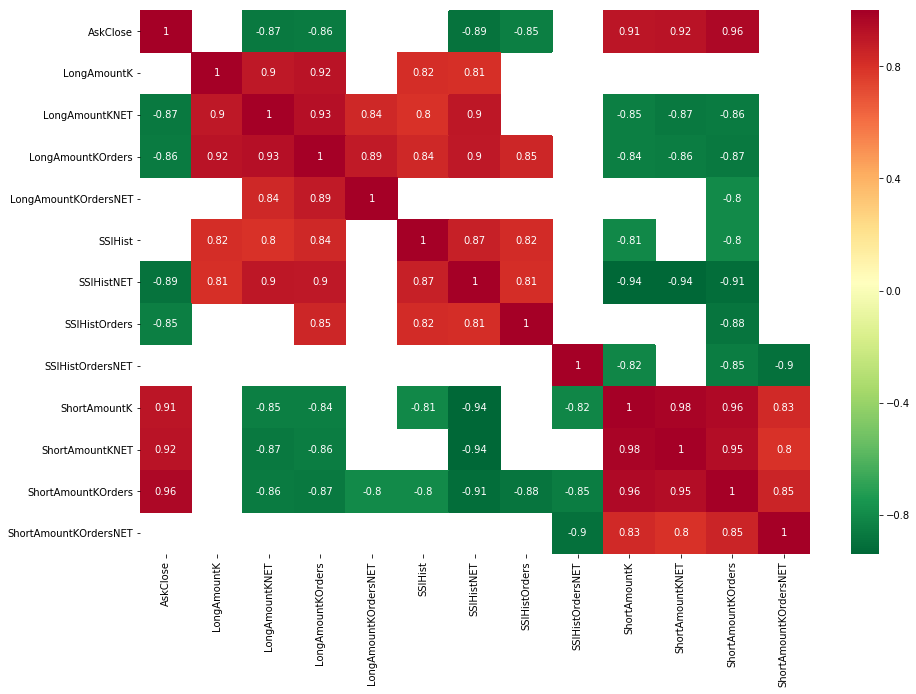

In [9]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

plt.subplots(figsize=(15,10))
sns.heatmap(combineddf.corr(), annot=True, cmap='RdYlGn_r', mask=(np.abs(combineddf.corr())<=0.8))



In [20]:
combineddf.head(5)

,AskClose,LongAmountK,LongAmountKNET,LongAmountKOrders,LongAmountKOrdersNET,SSIHist,SSIHistNET,SSIHistOrders,SSIHistOrdersNET,ShortAmountK,ShortAmountKNET,ShortAmountKOrders,ShortAmountKOrdersNET
DateTime,,,,,,,,,,,,,
2018-01-02 06:00:00,112.690,39298.0,25794.0,3504.0,903.0,-1.032826,-1.203148,-1.008276,1.037931,40588.0,31034.0,3533.0,870.0
2018-01-02 06:01:00,112.690,39136.0,25805.0,3500.0,904.0,-1.037842,-1.210463,-1.006571,1.039080,40617.0,31236.0,3523.0,870.0
2018-01-02 06:02:00,112.690,39887.0,26386.0,3502.0,902.0,-1.032392,-1.198666,-1.008852,1.027335,41179.0,31628.0,3533.0,878.0
2018-01-02 06:03:00,112.674,39888.0,26387.0,3503.0,903.0,-1.040388,-1.210748,-1.009135,1.028474,41499.0,31948.0,3535.0,878.0
2018-01-02 06:04:00,112.666,39771.0,26240.0,3503.0,903.0,-1.044580,-1.218102,-1.010277,1.027304,41544.0,31963.0,3539.0,879.0


In [23]:
X=combineddf.drop(['AskClose'],axis=1)
y=combineddf['AskClose']

In [24]:
X.head

<bound method NDFrame.head of                      LongAmountK  LongAmountKNET  LongAmountKOrders  \
DateTime                                                              
2018-01-02 06:00:00      39298.0         25794.0             3504.0   
2018-01-02 06:01:00      39136.0         25805.0             3500.0   
2018-01-02 06:02:00      39887.0         26386.0             3502.0   
2018-01-02 06:03:00      39888.0         26387.0             3503.0   
2018-01-02 06:04:00      39771.0         26240.0             3503.0   
2018-01-02 06:05:00      39770.0         26239.0             3502.0   
2018-01-02 06:06:00      39777.0         26246.0             3504.0   
2018-01-02 06:07:00      39735.0         26205.0             3505.0   
2018-01-02 06:08:00      39805.0         26275.0             3509.0   
2018-01-02 06:09:00      39820.0         26289.0             3510.0   
2018-01-02 06:10:00      39880.0         26349.0             3513.0   
2018-01-02 06:11:00      39884.0         26353.

In [25]:
y.head(5)

DateTime
2018-01-02 06:00:00    112.690
2018-01-02 06:01:00    112.690
2018-01-02 06:02:00    112.690
2018-01-02 06:03:00    112.674
2018-01-02 06:04:00    112.666
Name: AskClose, dtype: float64

In [26]:
scaler=MinMaxScaler(feature_range=(0,1))
X=scaler.fit_transform(X)

In [28]:
X

array([[0.17124611, 0.03194006, 0.01057692, ..., 0.77501276, 0.82326215,
        0.73297491],
       [0.16443996, 0.03237382, 0.00865385, ..., 0.78294148, 0.81871876,
        0.73297491],
       [0.19599193, 0.05528391, 0.00961538, ..., 0.7983279 , 0.82326215,
        0.74731183],
       ...,
       [0.52827493, 0.55792587, 0.58028846, ..., 0.25835067, 0.19945479,
        0.34229391],
       [0.52966137, 0.55922713, 0.58076923, ..., 0.25835067, 0.19945479,
        0.34229391],
       [0.53235022, 0.56253943, 0.58173077, ..., 0.25835067, 0.19900045,
        0.34229391]])

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [30]:
X_train.shape

(25992, 12)

In [31]:
X_test.shape

(6499, 12)

In [32]:
y_train.shape

(25992,)

In [33]:
y_test.shape

(6499,)

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import scorer
from sklearn.metrics import accuracy_score

In [39]:
cls = SVC().fit(X_train, y_train.astype('int'))

In [41]:
accuracy_train = accuracy_score(y_train.astype('int'), cls.predict(X_train))
accuracy_test = accuracy_score(y_test.astype('int'), cls.predict(X_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 89.61%
Test Accuracy: 90.49%
